In [1]:
import os

In [2]:
os.chdir("C:/Users/FLEXINK-02/Desktop/test_타이타닉")
print(os.getcwd())

C:\Users\FLEXINK-02\Desktop\test_타이타닉


In [3]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [65]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

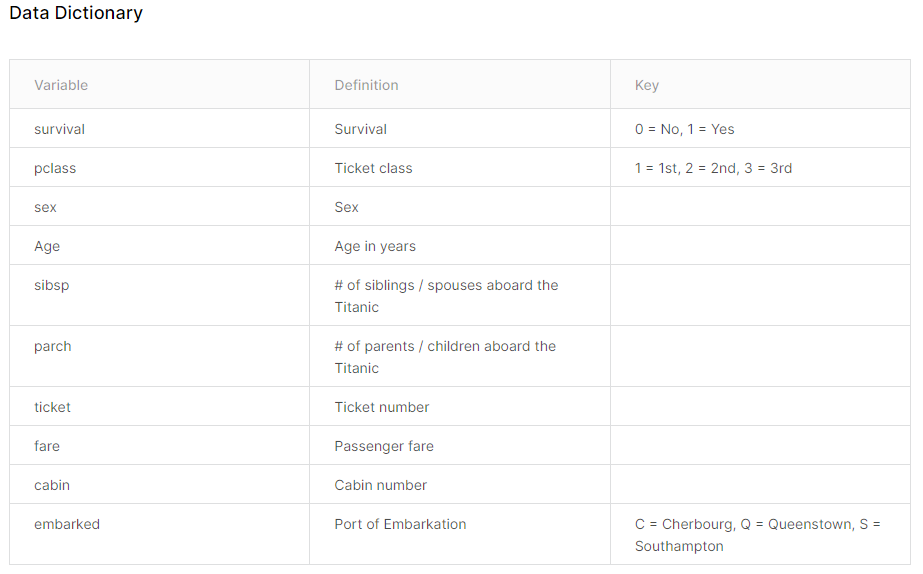

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# <font color=red> EDA	</font>

## <font color=blue>PassengerId	</font>


<AxesSubplot:>

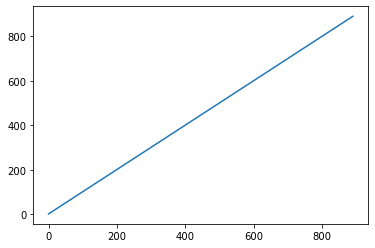

In [6]:
# 의미없는 인덱싱이므로 필요없음
train["PassengerId"].plot()

In [7]:
Survived=train[train["Survived"]==1]
UnSurvived=train[train["Survived"]==0]

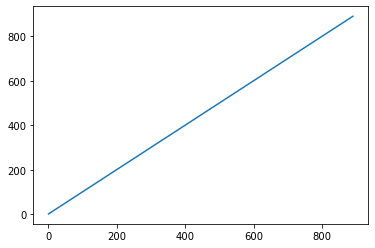

In [8]:
plt.plot(Survived["PassengerId"])
plt.show()

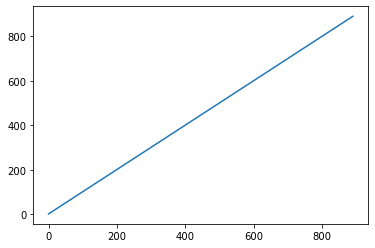

In [9]:
plt.plot(UnSurvived["PassengerId"])
plt.show()

## <font color=blue> Pclass	</font> 

In [10]:
# 클래스 별로 얼마나 살아남았는지
print("1 클래스가 얼마나 살아남았는지 : ", Survived[Survived["Pclass"]==1]["Survived"].count(),", 1 클래스에서 살아남은 비율 :",Survived[Survived["Pclass"]==1]["Survived"].count()/train[train["Pclass"]==1]["Survived"].count())
print("1 클래스가 얼마나 살아남았는지 : ", Survived[Survived["Pclass"]==2]["Survived"].count(),", 2 클래스에서 살아남은 비율 : ",Survived[Survived["Pclass"]==2]["Survived"].count()/train[train["Pclass"]==2]["Survived"].count())
print("1 클래스가 얼마나 살아남았는지 : ", Survived[Survived["Pclass"]==3]["Survived"].count(),", 3 클래스에서 살아남은 비율 : ",Survived[Survived["Pclass"]==3]["Survived"].count()/train[train["Pclass"]==3]["Survived"].count())     

1 클래스가 얼마나 살아남았는지 :  136 , 1 클래스에서 살아남은 비율 : 0.6296296296296297
1 클래스가 얼마나 살아남았는지 :  87 , 2 클래스에서 살아남은 비율 :  0.47282608695652173
1 클래스가 얼마나 살아남았는지 :  119 , 3 클래스에서 살아남은 비율 :  0.24236252545824846


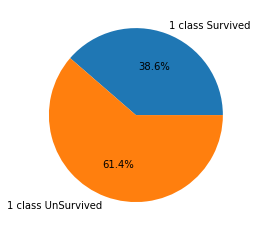

In [11]:
ratio=[Survived[Survived["Pclass"]==1]["Survived"].count(), train[train["Pclass"]==1]["Survived"].count()]
labels=['1 class Survived','1 class UnSurvived']
plt.pie(ratio,labels=labels,autopct='%.1f%%')
plt.show()

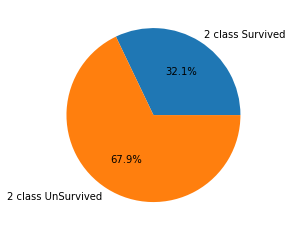

In [12]:
ratio=[Survived[Survived["Pclass"]==2]["Survived"].count(), train[train["Pclass"]==2]["Survived"].count()]
labels=['2 class Survived','2 class UnSurvived']
plt.pie(ratio,labels=labels,autopct='%.1f%%')
plt.show()

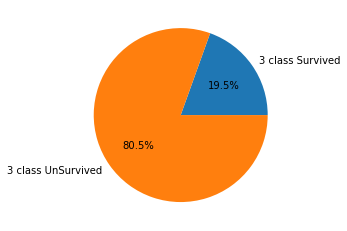

In [13]:
ratio=[Survived[Survived["Pclass"]==3]["Survived"].count(), train[train["Pclass"]==3]["Survived"].count()]
labels=['3 class Survived','3 class UnSurvived']
plt.pie(ratio,labels=labels,autopct='%.1f%%')
plt.show()

###  클래스 별로 생존율에 차이를 보이면 높은 클래스 일수록 더 높은 생존율을 보인다
### -> 유의미한 변수

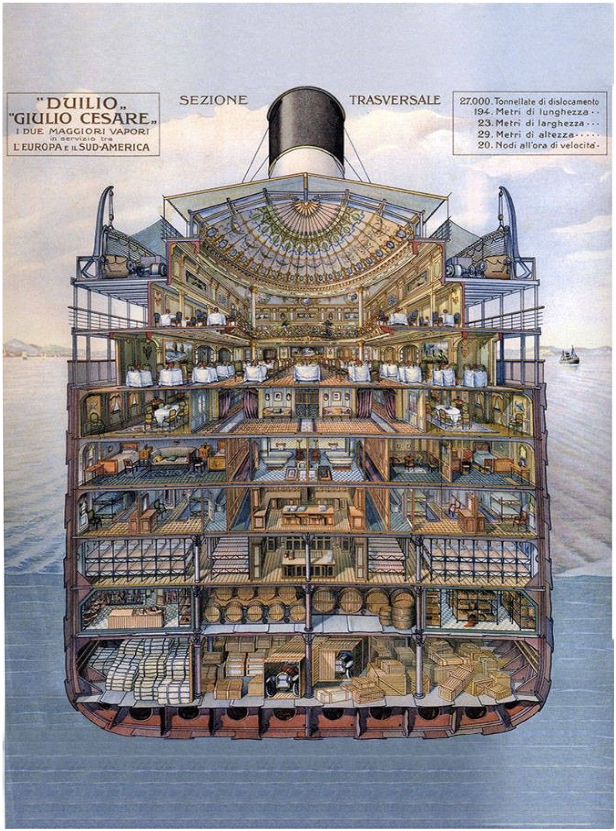

1등실
1등실에는 총 329명의 부유한 승객이 타고 있었다. 급한 사정보다는 여유를 즐기려고 승선한 승객이 많았다. 객실은 최상층인 보트 갑판부터 갑판 E(상갑판)까지 설치되어 있었으며 호화 호텔 수준이었고 개인 목욕탕이 있었다.

2등실
2등실에는 총 285명의 중산층 승객이 타고 있었다. 전체적으로 봤을 때 1등실만큼 좋지는 않았지만 그래도 비교적 편리한 시설이 설치되어 있었다. 객실은 갑판 D부터 갑판 F까지 설치되어 있었다. 흡연실(갑판 B), 레스토랑(갑판 B), 도서관(갑판 C), 상점 등이 있었다.

3등실
3등실에는 총 710명의 가난한 승객들이 타고 있었다. 주로 아메리칸 드림으로 미국에서 새로운 보금자리를 얻기 위해 승선한 승객들이었다. 객실은 2등실과 마찬가지로 갑판 D부터 갑판 G까지 설치되어 있었다.시설은 1등실과 2등실만 못하고 엔진이 가동되는 소리가 울려퍼졌으나 다른 배들에 비해서 비교적 좋은 대우를 해주었다. 배에 탑승하기 전에는 검역을 걸쳐서 전염병이나 이/벼룩을 확인했고 여자와 남자는 배의 앞머리와 뒷머리에 각각 따로 떨어져 승선했으나 가족 단위일 경우 같이 승선할 수 있었다.

## <font color=blue> Name	</font>

In [14]:
# 이름은 승객마다 고유하다
train['Name'].count()-len(list(set(train['Name'])))

0

In [15]:
Survived['Name']

1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
8      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                    Nasser, Mrs. Nicholas (Adele Achem)
                             ...                        
875                     Najib, Miss. Adele Kiamie "Jane"
879        Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)
880         Shelley, Mrs. William (Imanita Parrish Hall)
887                         Graham, Miss. Margaret Edith
889                                Behr, Mr. Karl Howell
Name: Name, Length: 342, dtype: object

In [16]:
UnSurvived['Name']

0                       Braund, Mr. Owen Harris
4                      Allen, Mr. William Henry
5                              Moran, Mr. James
6                       McCarthy, Mr. Timothy J
7                Palsson, Master. Gosta Leonard
                         ...                   
884                      Sutehall, Mr. Henry Jr
885        Rice, Mrs. William (Margaret Norton)
886                       Montvila, Rev. Juozas
888    Johnston, Miss. Catherine Helen "Carrie"
890                         Dooley, Mr. Patrick
Name: Name, Length: 549, dtype: object

### Name에 성별 정보, 결혼정보가 포함되어 있다 
### -> SEX에 성별이 있지만 결혼정보가 유의미할 수 도 있으므로 확인

## <font color=blue> sex	</font> 

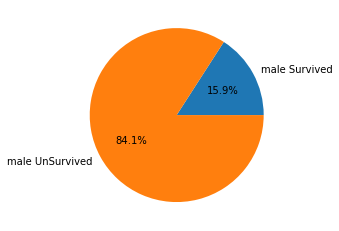

In [17]:
ratio=[Survived[Survived["Sex"]=='male']["Survived"].count(), train[train["Sex"]=='male']["Survived"].count()]
labels=['male Survived','male UnSurvived']
plt.pie(ratio,labels=labels,autopct='%.1f%%')
plt.show()

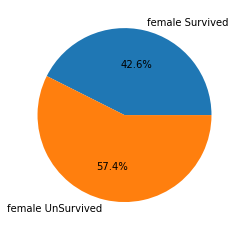

In [18]:
ratio=[Survived[Survived["Sex"]=='female']["Survived"].count(), train[train["Sex"]=='female']["Survived"].count()]
labels=['female Survived','female UnSurvived']
plt.pie(ratio,labels=labels,autopct='%.1f%%')
plt.show()

### 여자의 생존율이 남자의 생존율보다 높다 
### -> 유의미한 변수

## <font color=blue> Age </font> 

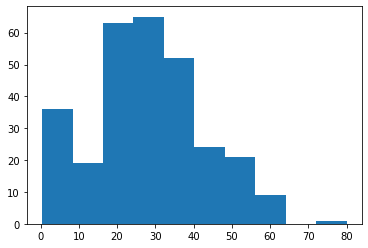

In [19]:
plt.hist(Survived['Age'])
plt.show()

In [20]:
Survived['Age'].describe()

count    290.000000
mean      28.343690
std       14.950952
min        0.420000
25%       19.000000
50%       28.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

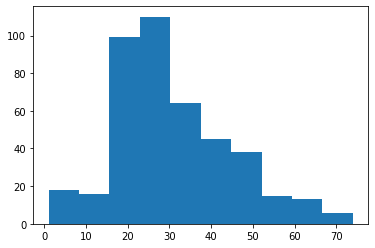

In [21]:
plt.hist(UnSurvived['Age'])
plt.show()

In [22]:
UnSurvived['Age'].describe()

count    424.000000
mean      30.626179
std       14.172110
min        1.000000
25%       21.000000
50%       28.000000
75%       39.000000
max       74.000000
Name: Age, dtype: float64

### UnSurvived가 Survived에 비해 조금 우편향이 있으나 정도는 미비 하다

## 여자, 어린이를 우선적으로 구명보트에 태운 당시의 관습 

2등 항해사 라이톨러는 선장에게 여자와 어린이를 먼저 태울 것을 건의하고, 선장은 승인했다. 1등 항해사 머독은 더 이상 여성과 아이들이 보이지 않으면 남자를 태우는 것을 허용하는 등 비교적 남성에게도 관대한 대응을 했지만 2등 항해사 라이톨러는 "여자와 어린이 먼저"를 "여자와 어린이만"으로 받아들여 혼란을 막기 위해 여성과 어린이 우선의 관습을 철저히 실시했다.

그리고 여자와 어린이만 태웠기 때문에 자리가 있었음에도 남자는 승무원들이 거부하였고 그로인해 구명보트 정원의 절반도 못태운채 보트가 내려간 것이다.

출처 : https://ko.wikipedia.org/wiki/RMS_%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89

##  <font color=blue> SibSp </font>  

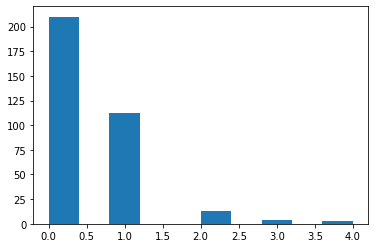

In [23]:
plt.hist(Survived['SibSp'])
plt.show()

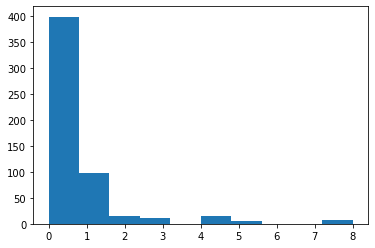

In [24]:
plt.hist(UnSurvived['SibSp'])
plt.show()

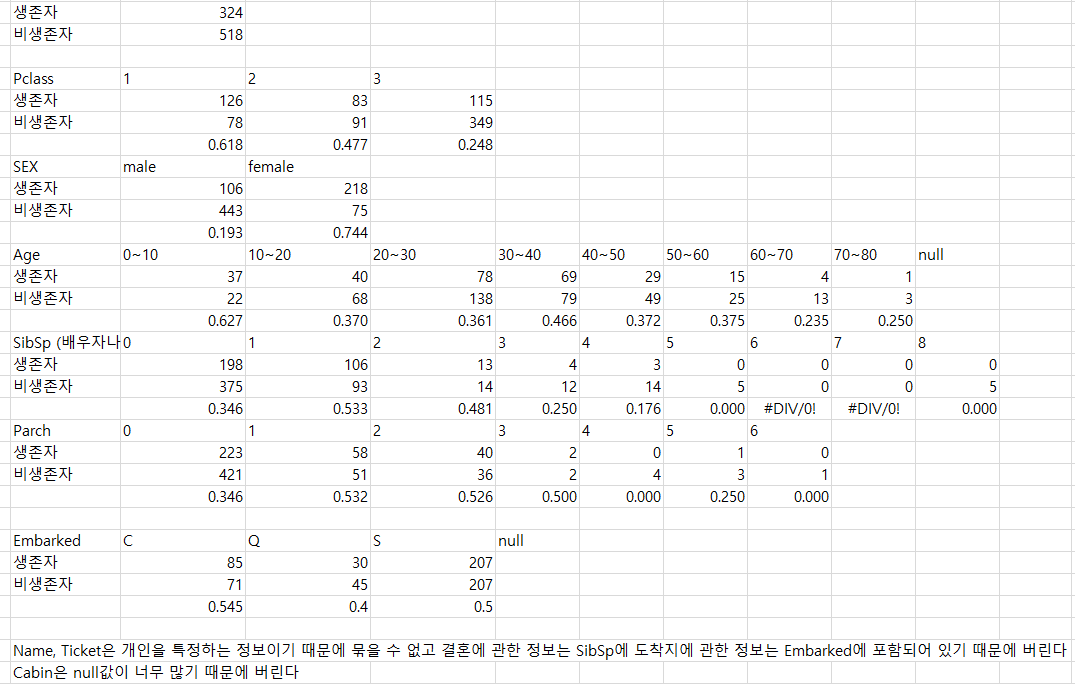


## 1) 생존자와 비생존자가 유의미하게 차이나는 것은 Pclass, SEX. AGE 등이다

## 2) 이 이유는 위에서 보인바와 같이 객실 위치,당시의 구조 관습에 기인한 것으로 보인다

# <font color=red> 전처리 및 모델링	</font>


In [25]:
# lgbm 리그레서 

import lightgbm as lgb
from sklearn.preprocessing import StandardScaler

In [66]:
# name, Ticket -> 필요없는 정보
# Cabin 제외 -> null값이 70%이상이므로 

train2=train.drop(['Name','Ticket','Cabin'],axis=1)
test2=test.drop(['Name','Ticket','Cabin'],axis=1)

In [70]:
# embarked -> 최빈값으로 채우기
train2['Embarked']=train2['Embarked'].fillna(train2['Embarked'].mode())
test2['Embarked']=test2['Embarked'].fillna(test2['Embarked'].mode())

In [71]:
# age -> null값 중위값으로 채우기 

train2['Age']=train2['Age'].fillna(train2['Age'].median())
test2['Age']=test2['Age'].fillna(test2['Age'].median())


In [72]:
train2['Age'].isnull().sum()

0

 ## 피쳐당 카테고리수가 많지 않으므로 정보량을 보존할 수 있는 원핫인코딩을 사용한다

In [81]:
# Sex 원핫인코딩
train3=pd.concat([train2,pd.get_dummies(train2['Sex'])], axis=1)
train3=train3.drop(['Sex'],axis=1)
test3=pd.concat([test2,pd.get_dummies(test2['Sex'])], axis=1)
test3=test3.drop(['Sex'],axis=1)

In [88]:
# Embarked 원핫인코딩

train3=pd.concat([train3,pd.get_dummies(train3['Embarked'])], axis=1)
train3=train3.drop(['Embarked'],axis=1)
test3=pd.concat([test3,pd.get_dummies(test3['Embarked'])], axis=1)
test3=test3.drop(['Embarked'],axis=1)

In [89]:
train3.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
female         0
male           0
C              0
Q              0
S              0
dtype: int64

In [90]:
train3

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,0,1,0,0,1
887,888,1,1,19.0,0,0,30.0000,1,0,0,0,1
888,889,0,3,28.0,1,2,23.4500,1,0,0,0,1
889,890,1,1,26.0,0,0,30.0000,0,1,1,0,0


In [91]:
# x,y split
train_x, test_x, train_y, test_y = train_test_split(train3.drop(['Survived'],axis=1), train3['Survived'], test_size=0.3, random_state=123)

In [92]:

train_ds = lgb.Dataset(train_x, label = train_y) 
test_ds = lgb.Dataset(test_x, label = test_y)

In [93]:
params = {'learning_rate': 0.01, 
          'max_depth': 16, 
          'boosting': 'gbdt', 
          'objective': 'regression', 
          'metric': 'mse', 
          'is_training_metric': True, 
          'num_leaves': 144, 
          'feature_fraction': 0.9, 
          'bagging_fraction': 0.7, 
          'bagging_freq': 5, 
          'seed':2018}

In [94]:
model = lgb.train(params, train_ds, 1000, test_ds, verbose_eval=100, early_stopping_rounds=100)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000306 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 404
[LightGBM] [Info] Number of data points in the train set: 623, number of used features: 11
[LightGBM] [Info] Start training from score 0.391653
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightG

In [95]:
predict_train = model.predict(train_x)
predict_test = model.predict(test_x)

In [96]:
import sklearn.metrics

fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_true = test_y, y_score = predict_test, pos_label = 1) #positive class is 1; negative class is 0
auroc = sklearn.metrics.auc(fpr, tpr)
auroc

0.8831932773109243

In [124]:
df=model.predict(test3)

In [125]:
df

array([ 0.09182817,  0.3670599 ,  0.05210681,  0.04074356,  0.36252677,
        0.40166032,  0.60175525,  0.20334163,  0.63081897,  0.0058602 ,
        0.09496636,  0.23555466,  0.95174095, -0.026902  ,  0.91662516,
        0.93152255,  0.11145222,  0.24400849,  0.46757686,  0.51089801,
        0.38054202,  0.57823331,  0.96437484,  0.56759442,  0.91175571,
        0.01219705,  0.97863506,  0.22541657,  0.41408254,  0.15476819,
       -0.0188958 ,  0.11482119,  0.36665837,  0.39277045,  0.5512201 ,
        0.23554584,  0.35041943,  0.32119744,  0.05103092,  0.33234363,
        0.15184224,  0.55292318,  0.012963  ,  0.87472106,  0.91566148,
        0.10934   ,  0.43811872,  0.19418572,  0.91710488,  0.45545872,
        0.54895594,  0.15444297,  0.81229786,  0.74954858,  0.18872043,
        0.26679533,  0.03516583,  0.11703674,  0.08589823,  1.00534719,
        0.14926211,  0.13931078,  0.15133338,  0.66160194,  0.64092425,
        0.91708185,  0.62800889,  0.32616481,  0.53712527,  0.87

In [126]:
threshold =0.75
for i in range(len(df)):
    if df[i] > threshold:
        df[i]=1
    else:
        df[i]=0

In [127]:
# threshold를 바꿔가면서 제출
df

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 1., 0., 1., 0.

In [128]:
pd.DataFrame(df).to_csv('test_5.csv',index=False)

threshold=0.5

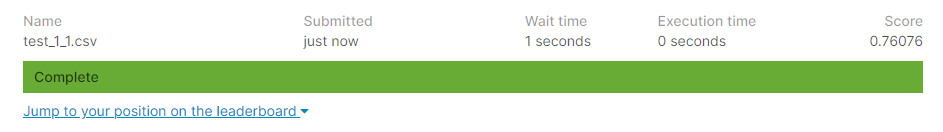


threshold=0.7

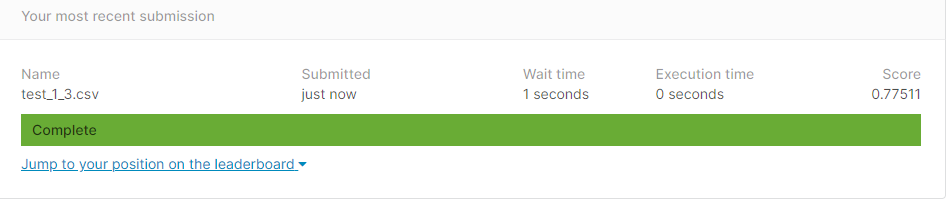

threshold=0.75

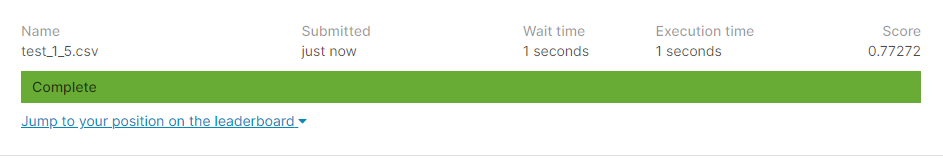

threshold=0.8

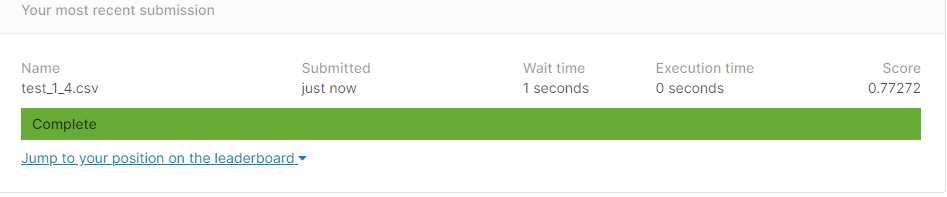

# threshold가 0.7일때 가장 높은 스코어(0.77511)를 보인다